<a href="https://colab.research.google.com/github/vrangayyan6/ramp-data/blob/main/binary_HOT_OSM_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Refer to fastai vision tutorial https://docs.fast.ai/tutorial.vision.html

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import glob
import shutil

from fastai.vision.all import *

In [ ]:
## Path for data loader to train.
path = Path("/content/drive/MyDrive/RAMP_HOME/ramp-data/TRAIN/HOTOSM/1")

## Codes are the classes required.
## Pixels have the value 0 if no building is present or nearby; ‘1’ if the pixel is in a building interior;
##  https://rampml.global/data-preparation/
codes = np.array(['background', 'buildings'])

In [ ]:
## get_image_files load data from file paths
fnames = get_image_files(path/"chips")
lnames = get_image_files(path/"binarymasks")

## We also need a function to return the label name from the folder.
def label_func(fn): return path/"binarymasks"/f"{fn.stem}.mask{'.tif'}"

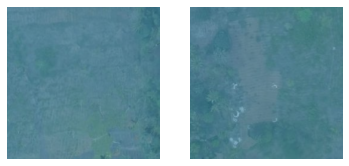

In [ ]:
## SegmentationDataLoaders is used as the data loader.
dls = SegmentationDataLoaders.from_label_func(
    path, bs=2, fnames = fnames, label_func = label_func, codes = codes
)


## Showing batches of data
dls.show_batch()

In [ ]:
torch.cuda.empty_cache()

In [ ]:
## Since it is image segmentation we use dataloader and resnet34 transfer learning model.
learn = unet_learner(dls, resnet34, metrics=(Dice(), JaccardCoeff()))            #, loss_func=CrossEntropyLossFlat(axis=1)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,dice,jaccard_coeff,time
0,0.355410,0.173862,0.013510,0.006801,00:12


epoch,train_loss,valid_loss,dice,jaccard_coeff,time
0,0.076354,0.062883,0.752268,0.602908,00:01
1,0.066174,0.101251,0.663172,0.496079,00:01
2,0.073358,0.066646,0.703335,0.542419,00:01
3,0.069772,0.098909,0.627734,0.457443,00:01
4,0.060288,0.066566,0.786634,0.648307,00:01
5,0.054837,0.061968,0.793851,0.658170,00:01


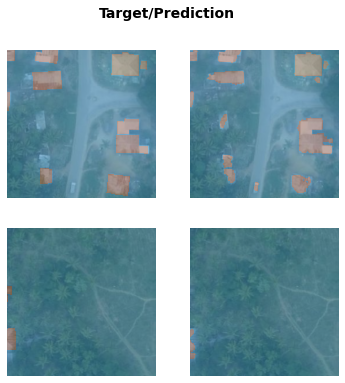

In [ ]:
learn.fine_tune(6)

## For visualizing results
learn.show_results( )

In [ ]:
# learn.fine_tune(6)

# ## For visualizing results
# learn.show_results( )

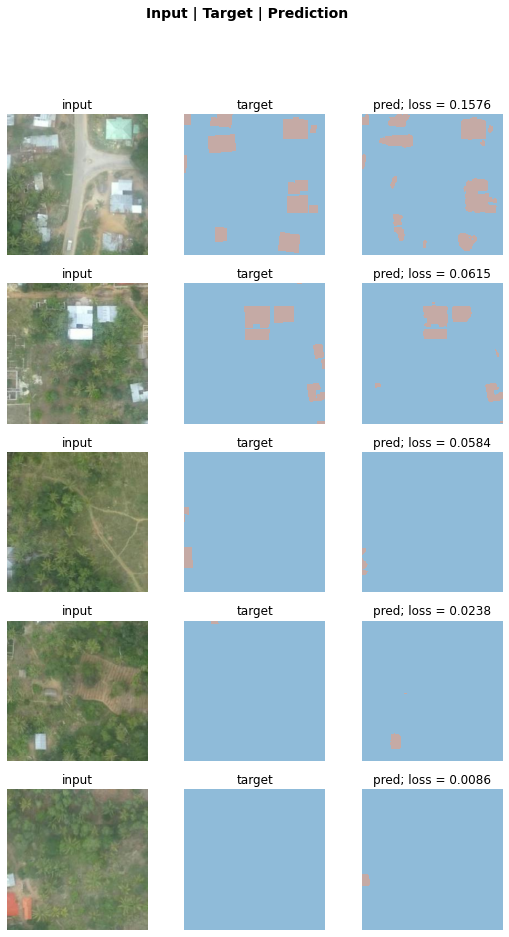

In [ ]:
interp = SegmentationInterpretation.from_learner(learn)
interp.plot_top_losses(k=5)